# Homework 10

`By   : Dr. James G. Shanahan
EMAIL: James.Shanahan AT Gmail.com`

__For HW10, you will be expected to answer questions about your work in this notebook via Canvas (Modules->Module 10->HW10 Notebook and submission form). You may wish to reference this quiz while working through the assignment.__
## Submission instructions¶
Before completing this homework,
1. please review this homework's submission form on Canvas available under the "Modules" menu option and briefly review this notebook end to end.
2. To get you started we provide a template solution with missing code and prompts. Please complete the missing code, run the experiments and log your results.
3. When you're sufficiently happy with your results, please begin the submission process on Canvas. Use the submission form for this homework available under "Modules" menu option. Please note that the submission form is available at the same place where you downloaded the homework from.
4. You may wish to reference the submission form (Modules->Module 10->HW10 Notebook and submission form) while working through the tasks.

Please complete all core assignment tasks (marked "TASK"). For your learnings, please complete the optional stretch assignment tasks (marked "OPTIONAL").

The goals of this HW include the following:
* Understanding the operation of a multiclass perceptron classifier.
* Building a multiclass perceptron classifier.
    * Applying regularization
    * Evaluating performance metrics unique to a multiclass problem.
* Tuning a multiclass perceptron for text classification.
  
You will submit the results of your work in this notebook using the **HW 10 Submission Form** assignment on Canvas.

## Prepare the notebook

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import re
import nltk
from pprint import pprint
from time import time

from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import make_classification
from nltk.corpus import stopwords
from nltk.corpus import reuters
nltk.download('stopwords')
nltk.download('reuters')

from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from IPython.display import Image

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


# Perceptrons

In [2]:
!pwd

/root/shared


In [4]:
Image(filename='./images/02_03.png', width=600) 

FileNotFoundError: [Errno 2] No such file or directory: './images/02_03.png'

In [5]:
Image(filename='./images/02_04.png', width=600) 

FileNotFoundError: [Errno 2] No such file or directory: './images/02_04.png'

## Perceptrons in SKLearn

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int) #2-class problem Iris-Setosa versus not

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

#make a prediction for one example
y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([1])

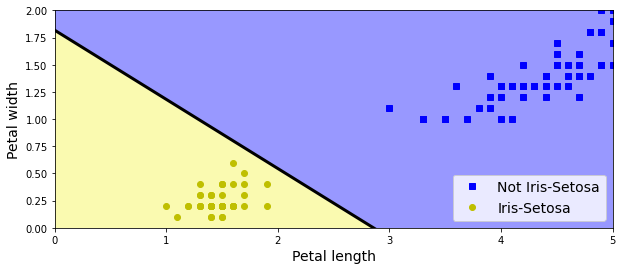

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, linewidth=5)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#plt.save_fig("perceptron_iris_plot")
plt.show()

# TASK: Multiclass Perceptron : variable importance

Compare the hyperplane coefficients barchart  with the pairwise visualization and complete the analysis provided below.

## Load the data and build a perceptron classifier model

In [10]:
from sklearn.impute import SimpleImputer

irisDataset = load_iris() 

X = irisDataset.data
y = irisDataset.target

#create a heldout dataset for final testing only
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
df = pd.DataFrame(X, columns=irisDataset.feature_names)
df['IrisClass'] = y

perceptron_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #Use the "median" to impute missing vlaues
        ('std_scaler', StandardScaler()),
        ('perceptron', Perceptron(random_state=42))
    ])
# Fit the train data to the pipeline
# Predict for X-test
#==================================================#
#               Your code starts here              #
#==================================================#
perceptron_pipeline.fit(X_train,y_train)
preds = perceptron_pipeline.predict(X_test) 
# TODO - change the following code
# perceptron_pipeline.fit()
# preds = 
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

### Generate visualizations (pairwise scatterplot and bar chart of the model coefficients)

[[-0.318  0.581 -1.783 -2.001]
 [-0.279 -2.003  2.14  -2.546]
 [-0.839 -1.327  6.89   5.28 ]]


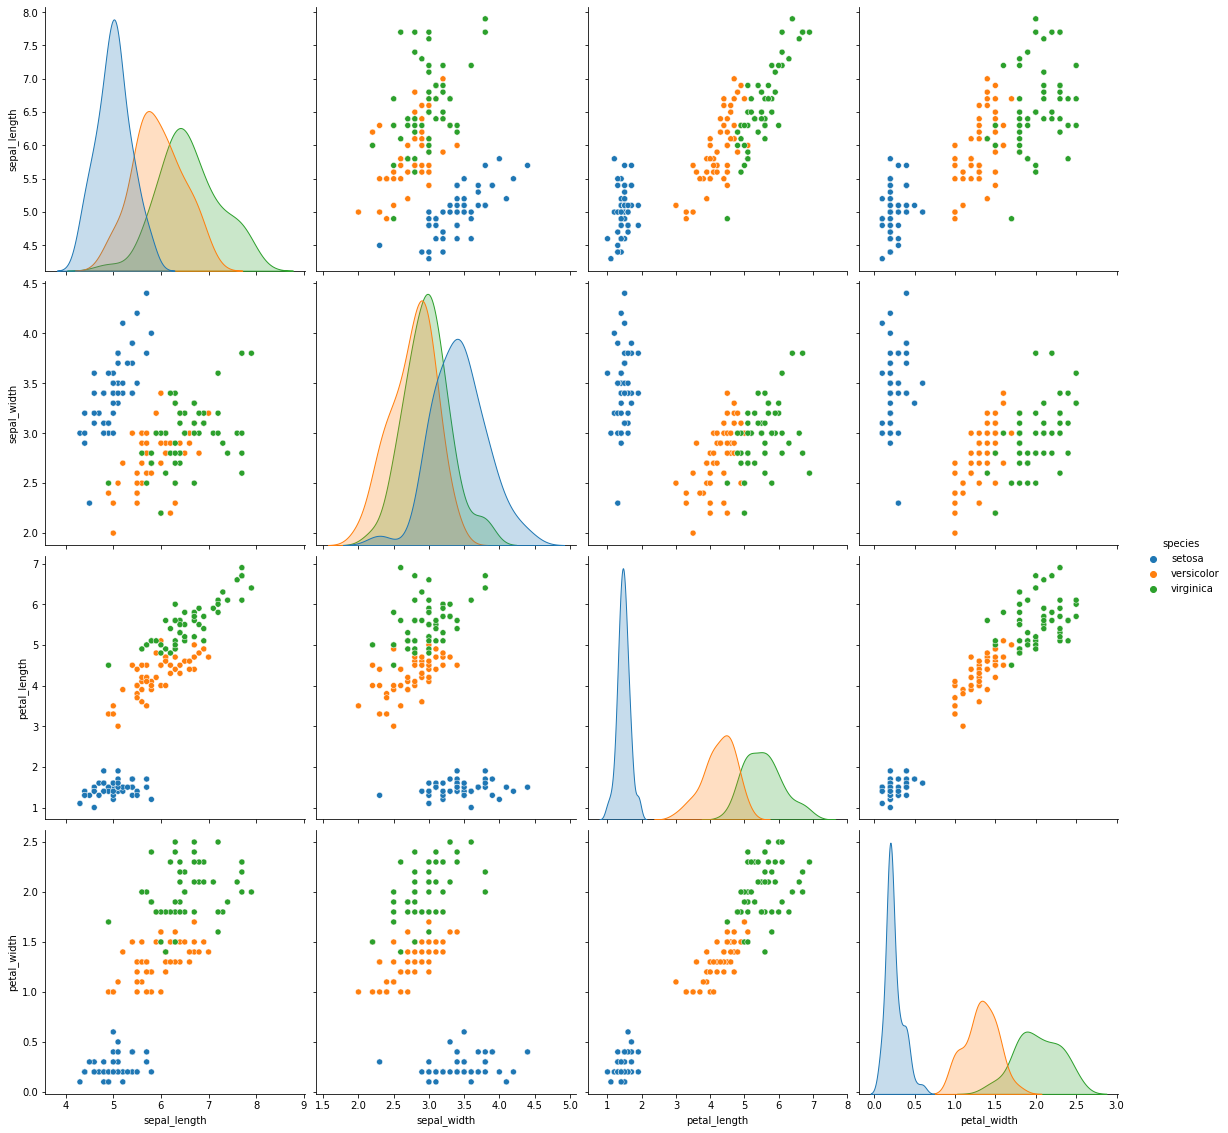

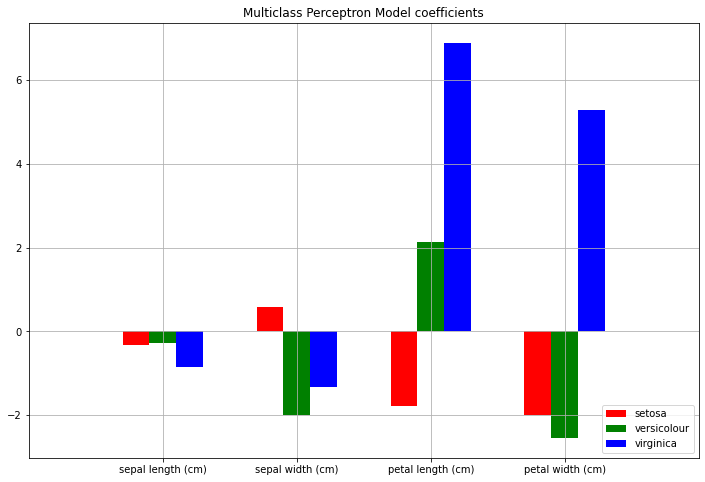

In [13]:
sns.pairplot(sns.load_dataset("iris"), hue="species", height=4);

model = perceptron_pipeline.named_steps['perceptron']
print(np.round(model.coef_,3))
plt.figure(figsize=(12, 8))
plt.bar(np.arange(model.coef_.shape[1]) - 0.2, model.coef_[0], color="red", width=0.2, label="setosa")
plt.bar(np.arange(model.coef_.shape[1]) - 0.0, model.coef_[1], color="green", width=0.2, label="versicolour")
plt.bar(np.arange(model.coef_.shape[1]) + 0.2, model.coef_[2], color="blue", width=0.2, label="virginica")
plt.xticks(np.arange(model.coef_.shape[1]), df.columns[:4], rotation=0)
plt.xlim([-1, model.coef_.shape[1]])
plt.title("Multiclass Perceptron Model coefficients")
plt.legend(loc="lower right");
plt.grid()


### Fill in the blanks to complete the analysis

Use the results of the hyperplane cooefficient's barchart with the pairwise feature distributions to understand how the different features can be used to classify the different iris classes

**Fill in the appropriate text:**

Compare the hyperplane cooefficients barplot above with the pairwise feature distributions plotted previously.

Looking at the barplot, one can see that **___sepal length_________** has the least influence on defining a separating hyperplane for the versicolour class.  Looking at the the pairwise plot, this feature does not distinguish versicolour in combination with any other feature.

Looking at the second column on the pairwise plot, setosa and versicolor classes are both impossible to distinguish based on **_____sepal width_______**; we can observe that 99% of the vertical lines that can be drawn, contain more than one class and hence wont be able to separate classes based on this feature.

Both petal width and petal length are excellent features to consider since either one can separate 100% of **____serotosa________**.  In combination, they are able to separate close to 100% of the remaining classes too. **___serotosa_________**  is the most influential factor in determining **_____sepal width_______** class. This is also clearly visible in the pairwise plot, as 99% of the vertical lines clearly indicate exactly one class.

**Note:** Petal length and Virginica, or petal width and Versicolour were also acceptable options to the final pair of questions.

# TASK: Multiclass  perceptron with regularization

When you’re tired of running through the Iris or Breast Cancer or  datasets (or Boston) for the umpteenth time, sklearn has a neat utility that lets you generate classification datasets (and regression datasets).

Its use is pretty simple. A call to the function yields input attributes X  and a target vector of the same length. 

In [14]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification()
print(X.shape, y.shape) # E.g., (100, 20) (100,)

(100, 20) (100,)


In addition, you can customize the following:

* number of linear combinations and repeated features to trip up your models,
* or how many informative variables there are

Note the total number of features comprise n_informative informative features, n_redundant redundant features, n_repeated duplicated features and n_features - n_informative-n_redundant-n_repeated useless features drawn at random.

`X, y = make_classification(n_redundant=4, n_repeated=5, n_informative=10)`

To understand the n_informative parameter, please read the sklearn manual pages - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html 

Using the SKLearn class `SGDClassifier` within the pipeline provided below, learn multiclass perceptron using gridsearch to evaluate:
* L1, L2 and elasticnet regularization
* alpha values $\in [10, 1, 0.1, 0.01, 0.001)$

References - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

Report your accuracy score on your test data and the hyperparameters for your best model.

In [17]:
# The number of informative features. Each class is composed of a number
# of gaussian clusters each located around the vertices of a hypercube
# in a subspace of dimension ``n_informative``. For each cluster,
# informative features are drawn independently from  N(0, 1) and then
# randomly linearly combined within each cluster in order to add
# covariance. The clusters are then placed on the vertices of the
# hypercube.

# generate classification dataset
x, y = make_classification(1000, n_classes=3, n_informative=6, random_state=42)

# generate splits for crossfold validation
cv = KFold(3, random_state=42, shuffle=True)
cv_idx = cv.split(x)


# Create a pipeline, where the first step is scaling the features using StandardScaler()
# and the second step is SGDClassifier() with loss='perceptron' and random_state=42
#==================================================#
#               Your code starts here              #
#==================================================#
pipeline = Pipeline([
    ("scalar", StandardScaler()),
    ("perceptron", SGDClassifier(loss='perceptron', random_state = 42))
])
    
# TODO - change the following code
# pipeline = Pipeline([
#       ('std_scaler', ),
#       ('perceptron', )
# ])
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


parameters = { 
    'perceptron__alpha': (10, 1, 0.1, 0.01, 0.001),
    'perceptron__penalty': ('l1', 'l2', 'elasticnet'),
}


grid_search = GridSearchCV(pipeline, parameters, cv=cv_idx, n_jobs=-1, verbose=1, )
grid_search.fit(x,y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
    
preds = grid_search.predict(x)
accuracy = accuracy_score(preds, y)

results = pd.DataFrame(columns=["Model", "Test Accuracy"])
results.loc[len(results)] = ["Perceptron", np.round(accuracy, 3)]
results

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best score: 0.527
Best parameters set:
	perceptron__alpha: 0.01
	perceptron__penalty: 'elasticnet'


,Model,Test Accuracy
0,Perceptron,0.443


# Calculate F1 score with micro and macro averaging




## Equation  $F_1$ score

$
F_1 = \cfrac{2}{\cfrac{1}{\text{precision}} + \cfrac{1}{\text{recall}}} = 2 \times \cfrac{\text{precision}\, \times \, \text{recall}}{\text{precision}\, + \, \text{recall}} = \cfrac{TP}{TP + \cfrac{FN + FP}{2}}
$





So for our Reuters multiclass classification problem the labels are not binary, but are one-hot encoded. Fortunately, there are  options that work with this type of labeled  data for Precision:

* precision_score(y_test, y_pred, average=None) will return the precision scores for each class, while
* precision_score(y_test, y_pred, average='micro') will return the total ratio of tp/(tp + fp)
* precision_score(y_test, y_pred, average='macro') will return macro average (class average = sum(precision)/numOfClasses). This option is much preferred which dealing with imbalanced data.

The same is true for other performance measures such as F1.

References - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MultiLabelBinarizer.html

### Run this code to generate targets and predictions

In [18]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.utils import shuffle
import numpy as np


_, y1 = make_classification(n_samples=20, n_features=100, n_informative=30, n_classes=5, random_state=12)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
y4 = shuffle(y1, random_state=3)


y_text = np.vstack((y1, y2, y3, y4)).T

# One hot encode the target class variables
mlb = MultiLabelBinarizer(classes=(0, 1, 2, 3, 4))
y = mlb.fit_transform(y_text)

# Use make_classification to create a cluster of 20 sample points
# with a 100 features, 30 informative features, 5 classes
# and random state =42
#==================================================#
#               Your code starts here              #
#==================================================#
_, y1 = make_classification(n_samples = 20, n_features = 100, n_informative = 30, n_classes = 5, random_state = 42)
# TODO - change the following code
# _, y1 = make_classification()
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
y4 = shuffle(y1, random_state=3)
y5 = shuffle(y1, random_state=4)

#NOTE: Y target vector for 3 classes
# note that each example can have one or MORE class labels
y_preds_text = np.vstack((y1, y2, y3, y4, y5)).T     
# One hot encode the target class variables
mlb = MultiLabelBinarizer(classes=(0, 1, 2, 3, 4))
y_preds = mlb.fit_transform(y_preds_text)

### These are the 20 multilabel targets:

In [19]:
y

array([[1, 1, 0, 0, 1],
       [0, 0, 1, 1, 1],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 0, 1],
       [0, 0, 1, 1, 0],
       [1, 1, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 0, 1],
       [0, 0, 0, 1, 1],
       [0, 1, 0, 1, 1],
       [1, 0, 0, 1, 1],
       [0, 1, 1, 1, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0],
       [0, 1, 0, 1, 1],
       [0, 0, 1, 1, 1],
       [1, 1, 0, 1, 0]])

### These are the 20 predictions generated by our "model":

In [20]:
print(y_preds)

[[1 1 0 0 1]
 [1 1 1 1 1]
 [0 1 1 1 1]
 [1 1 0 1 0]
 [1 0 1 1 0]
 [0 1 1 1 1]
 [1 1 0 1 0]
 [0 1 1 1 0]
 [1 0 1 0 1]
 [1 1 0 1 1]
 [1 0 1 1 1]
 [1 1 0 1 1]
 [1 1 0 1 1]
 [1 0 1 1 0]
 [1 1 0 1 1]
 [0 1 1 0 1]
 [1 1 1 0 0]
 [1 1 1 0 1]
 [1 0 1 1 1]
 [0 1 1 1 1]]


## TASK: Using the one-hot encoded targets and predictions data above (for 20 multi-label samples) calculate the F1 score using a micro and macro approach.

In [21]:
# Complete the following code to calculate the
# F1 score with the micro and macro approach
#==================================================#
#               Your code starts here              #
#==================================================#

print("F1 Micro:",round(f1_score(y, y_preds, average = 'micro'),3))
print("F1 Macro:",round(f1_score(y, y_preds, average = 'macro'),3))

# TODO - change the following code
# print("F1 Micro:",round(f1_score(....),3))
# print("F1 Macro:",round(f1_score(....),3))
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

F1 Micro: 0.636
F1 Macro: 0.63


# [Optional Task] Reuters classification with different numbers of classes k


**Reuters Description:**

Reuters corpus is a collection of 21578 articles published on Reuters in 1987, collected and indexed into categories by Reuters ltd.

The documents are Reuters newswire stories, and the categories are five different sets of content related categories.

There are 7,769 training documents and 3,019 testing documents that have been hand classified by experts into 90 categories. Some documents have been assigned multtple categories.

For example, the top three categories in the Reuters dataset are earn, acq and money-fx. The RAW corpus is distributed in a XML form and the documents are divided into several groups/splits.  However, a preprocessed version is available in NLTK. For more details see [here](http://www.nltk.org/howto/corpus.html)


* The Reuters-21578 benchmark corpus, ApteMod version  id: reuters; size: 6378691; author: ; copyright: ; license: The copyright for the text of newswire articles and Reuters annotations in the Reuters-21578 collection resides with Reuters Ltd. Reuters Ltd. and Carnegie Group, Inc. have agreed to allow the free distribution of this data *for research purposes only*. If you publish results based on this data set, please acknowledge its use, refer to the data set by the name 'Reuters-21578, Distribution 1.0', and inform your readers of the current location of the data set.;


## Load all the data

Using the code provided below, generate a series of experiments based on the Reuters dataset:

At a minimum:
* Compare the perceptron algorithm to logistic regression ("log" loss). 
* Experiment with unigrams and bigrams.
* Experiment with at least two more hyperparameters.

Keep a log of your results for each experiment in a table of results (pandas dataframe).  Your table of results should be a meaningful record or your work on this task, not a dump of grid search output for one experiment.  Please include:
* Description of the model (e.g., Baseline Logistic Regression k=30, Perceptron k=50, etc.).
* Identify key hyperparameters.
* Precision, recall and F1 scores calculated using micro and macro approach.
* Time to complete the experiment.
* Hardware used.

Think about how (and why) these changes affect your results.


In [ ]:
documents = reuters.fileids()
test = [d for d in documents if d.startswith('test/')]
train = [d for d in documents if d.startswith('training/')]

cachedStopWords = nltk.download("stopwords") #stopwords.words("english")
cachedStopWords = nltk.corpus.stopwords.words('english')
np.random.seed(42)
def loadReutersTrainTest():
    documents = reuters.fileids()
    train_docs_id = list(filter(lambda doc: doc.startswith("train"), documents))
    test_docs_id = list(filter(lambda doc: doc.startswith("test"), documents))
    #Input text
    train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]
    test_docs = [reuters.raw(doc_id) for doc_id in test_docs_id]
    #Categories 
    # Complete the following code to get the categories
    # of the train and the test set
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    
    train_target_names = [reuters.categories(...) for ... in ...]
    test_target_names = [reuters.categories(...) for ... in ...]
    
    # TODO - change the following code
    # train_target_names = [reuters.categories(...) for ... in ...]
    # test_target_names = [reuters.categories(...) for ... in ...]
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    return(train_docs, test_docs, train_target_names, test_target_names)

train_docs, test_docs, train_target_names, test_target_names = loadReutersTrainTest()

print("Number of train docs is ", len(train_docs))
print("Number of test docs is ", len(test_docs))


## The categories (classes) of the dataset

In [ ]:
# create counter to summarize
categories = []
file_count = []
np.random.seed(42)
# count each tag's number of documents
for i in reuters.categories(reuters.fileids()):
    """print("$ There are {} documents included in topic \"{}\""
          .format(len(reuters.fileids(i)), i))"""
    file_count.append(len(reuters.fileids(i)))
    categories.append(i)

# create a dataframe out of the counts
allCategories  = pd.DataFrame(
    {'categories': categories, "file_count": file_count}) \
    .sort_values('file_count', ascending=False)
allCategories

## Load data using a number of classes k=20

In [ ]:
# determines number of categories
k=20
# Select documents that only contains top two labels with most documents
category_filter =allCategories.iloc[0:k, 0].values.tolist()
print(category_filter)

In [ ]:
#load examples for top K classes
def loadReutersTrainTestTopFiltered(category_filter):
    # select fileid with the category filter
    np.random.seed(42)
    documents = reuters.fileids()

    doc_list = np.array(reuters.fileids(category_filter))
    doc_list = doc_list[doc_list != 'training/3267']

    train_docs_id = list(filter(lambda doc: doc.startswith("train"), doc_list))
    test_docs_id = list(filter(lambda doc: doc.startswith("test"), doc_list))
    #Input text
    train_docs = [reuters.raw(doc_id) for doc_id in train_docs_id]
    test_docs = [reuters.raw(doc_id) for doc_id in test_docs_id]
    #Categories 
    train_target_names = [reuters.categories  (doc_id) for doc_id in train_docs_id]
    test_target_names = [reuters.categories  (doc_id) for doc_id in test_docs_id]
    #remove labels from each example that have not been selected
    # ['earn', 'acq', 'money-fx', 'grain', 'crude', 'trade', 'interest', 'ship', 'wheat', 'corn']
    # E.g., ['Japanese Anime',  'earn', 'acq']  --> ['earn', 'acq'] 
    transformedTags = []
    for tags in train_target_names:
        tagsTmp=[]
        for tag in tags:
            if tag in category_filter:
                tagsTmp.append(tag)
        transformedTags.append(tagsTmp)
    train_target_namesK = transformedTags  
    
    transformedTags = []
    for tags in test_target_names:
        tagsTmp=[]
        for tag in tags:
            if tag in category_filter:
                tagsTmp.append(tag)
        transformedTags.append(tagsTmp)
    test_target_namesK = transformedTags    
   
    return(train_docs, test_docs, train_target_namesK, test_target_namesK)

train_docs, test_docs, train_target_names, test_target_names = loadReutersTrainTestTopFiltered(category_filter)
print("Number of train docs is ", len(train_docs))
print("Number of test docs is ", len(test_docs))
mlb = MultiLabelBinarizer(classes=category_filter)
Y_train = mlb.fit_transform(train_target_names)
Y_test = mlb.fit_transform(test_target_names)



## Defining the pipeline

In [ ]:
# Define a pipeline combining the text feature extractor CountVectorizer
# using cachedStopWords as stop_words, TfidfTransformer() and 
# MultiOutputClassifier() with SGDClassifier() as a parameter and max_iter=50 as parameter within SGDClassifier()
#==================================================#
#               Your code starts here              #
#==================================================#

pipeline = Pipeline(...)


# TODO - change the following code
# pipeline = Pipeline([
#     ('vect', ),
#     ('tfidf', ), 
#     ('clf', )),])

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
pipeline.named_steps

## Defining evaluation function

In [ ]:
#Multi-labels per example evaluation
def evaluate(test_labels, predictions):
    precision = precision_score(test_labels, predictions, average='micro')
    recall = recall_score(test_labels, predictions, average='micro')
    f1 = f1_score(test_labels, predictions, average='micro')
    print("Micro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))

    # Complete the following code to calculate the
    # precision, recall and F1 score using the macro approach
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    
    precision = precision_score(...)
    recall = recall_score(...)
    f1 = f1_score(...)
    
    # TODO - change the following code
    # precision = precision_score()
    # recall = recall_score()
    # f1 = f1_score()
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    print("Macro-average quality numbers")
    print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision, recall, f1))
    

## Performing GridSearch 

In [ ]:

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
# Parameters of the estimators in the pipeline can be accessed using the <estimator>__<parameter> syntax:
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    #'vect__max_df': (0.5, 0.75, 1.0),
    #'vect__max_features': (None, 200,500),     
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'clf__estimator__alpha': (0.001, 0.01, .1),        ## access parameters for the estimator inside
    'clf__estimator__penalty': ('l1', 'l2', 'elasticnet'),  ## the MultioutputClassifier step by using
    'clf__estimator__loss': ('perceptron', 'log')     ## step__MultioutputClassierParameter__EstimatorParameter
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    #seeting shuffle=True
    cv = KFold(n_splits=3, random_state=42, shuffle=True)
    # added return_train_score=True
    grid_search = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-2, verbose=1, scoring="f1_micro", return_train_score=True)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(train_docs, Y_train)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    #Test on Heldlout test set
    preds = grid_search.best_estimator_.predict(test_docs)
    print("--------------------------------------------------------------------")
    evaluate(Y_test, preds)
    

### mean_train_score	and mean_test_score
the gridsearch attribute of `cv_results_`  `mean_train_score` is calculated as the average of the training scores of each cross validation fold. Since in this case we are using `"f1_micro"`as as scoring metric. Each `mean_train_score` is the mean of the 3 (`n_splits=3`) `f1_micro scores`. The same logic applies for  `mean_test_score`

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
results = pd.DataFrame(grid_search.cv_results_).loc[:, ['mean_train_score','mean_test_score','params','mean_fit_time','mean_score_time']].sort_values(by='mean_test_score', ascending=False)
results.head(20)


## Reuters Classification with SVM
### Defining the pipeline for SVM

In [ ]:
from sklearn import svm
# Define a pipeline combining the text feature extractor CountVectorizer
# using cachedStopWords as stop_words, TfidfTransformer() and 
# MultiOutputClassifier() with SVC() as a parameter and max_iter=50 as parameter within SVC()
#==================================================#
#               Your code starts here              #
#==================================================#

pipeline = Pipeline(...)
     
# TODO - change the following code
# pipeline = Pipeline([
#     ('vect', ),
#     ('tfidf', ), 
#     ('clf', )),])

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
pipeline.named_steps

### Performing gridsearch for SVM

In [ ]:
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

# uncommenting more parameters will give better exploring power but will
# increase processing time in a combinatorial way
# Parameters of the estimators in the pipeline can be accessed using the <estimator>__<parameter> syntax:
parameters = { #listed in the form of "step__parameter", e.g, clf__penalty
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams (single words) or bigrams (or sequence of words of length 2)
    #'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    'svm__estimator__C': (.1, 1, 10),        ## access parameters for the estimator inside
    'svm__estimator__kernel': ('linear', 'poly'),  ## the MultioutputClassifier step by using
    'svm__estimator__degree': (1,2,3)     ## step__MultioutputClassierParameter__EstimatorParameter
}

if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer.
    #
    # By default, the GridSearchCV uses a 3-fold cross-validation. However, if it 
    #            detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
    
    #setting shuffle=True
    cv = KFold(n_splits=3, random_state=42, shuffle=True)
    grid_search = GridSearchCV(pipeline, parameters, cv=cv, n_jobs=-2, verbose=1, scoring="f1_micro", return_train_score=True)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(train_docs, Y_train)
    print("done in %0.3fs" % (time() - t0))
    print()
    #print("grid_search.cv_results_", grid_search.cv_results_)
    #estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
    #            Either estimator needs to provide a score function, or scoring must be passed.
    #Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    # Complete the code below to get the parameters of your best model based on gridsearch
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    best_parameters = ...
    
    # TODO - change the following code
    # best_parameters = 
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
        
    #Test on Heldlout test set
    preds = grid_search.best_estimator_.predict(test_docs)
    print("--------------------------------------------------------------------")
    evaluate(Y_test, preds)
    

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

results = pd.DataFrame(grid_search.cv_results_).loc[:, ['mean_train_score','mean_test_score','params','mean_fit_time','mean_score_time']].sort_values(by='mean_test_score', ascending=False)
results.head(20)


# [Optional Task] Multiclass perceptron: classification+training

Like most other techniques for training linear classifiers, the perceptron generalizes naturally to multiclass classification. Here, the input ${\displaystyle x}$  and the output ${\displaystyle y}$  are drawn from arbitrary sets. A feature representation function ${\displaystyle f(x,y)}$  maps each possible input/output pair to a finite-dimensional real-valued feature vector. As before, the feature vector is multiplied by a weight vector ${\displaystyle w}$, but now the resulting score is used to choose among many possible outputs:

$${\displaystyle {\hat {y}}=\operatorname {argmax} _{y}f(x,y)\cdot w.} $$



Learning again iterates over the examples, predicting an output for each, leaving the weights unchanged when the predicted output matches the target, and changing them when it does not. 

Given that the predicted class ${\hat{y}}$ is different to that actual class $y$:


$${\displaystyle {\hat {y}}=\operatorname {argmax} _{y}f(x,y)\cdot w.} $$

the update becomes for each $w_{i,j}$:



$
\begin{split}
\operatorname{update}(\hat{y},y) =
\begin{cases}
y_j = y& {w_{i,j}}^{(\text{next step})} = w_{i,j} + \eta  x_i\\
{y}_k = \hat{y}  & {w_{i,k}}^{(\text{next step})} = w_{i,k} - \eta  x_i
\end{cases} & \quad\quad
\end{split}
$

The above gradient update step for the multiclass perceptron is as follows:
* for every wrong prediction, penalize(reduce) the weights (and perpendicular distance) that got predicted wrongly and 
* increase the weights of the class that was the target, that we failed to predict correctly.


This multiclass feedback formulation reduces to the original perceptron when ${\displaystyle x}$  is a real-valued vector, ${\displaystyle y}$ is chosen from ${\displaystyle \{0,1\}} $, and ${\displaystyle f(x,y)=yx} $.

** Perceptron learning rule (weight update) for binary classifier**

$
{w_{i,j}}^{(\text{next step})} = w_{i,j} + \eta (y_j - \hat{y}_j) x_i
$



## [Optional Task] Complete the following code to build a Multiclass Perceptron algorithm

In [ ]:
class HomeGrownPerceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [ ]:
import numpy as np


class MulticlassHomeGrownPerceptron(HomeGrownPerceptron):
    """ Multiclass HomeGrown Perceptron classifier."""

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        n_classes = np.unique(y).size
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=(n_classes, 1 + X.shape[1]))
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                predicted = self.predict(xi)
                if target != predicted:  #Mistake
                    # Complete the following code to 
                    # Reduce the score of the incorrectly predicted class
                    #==================================================#
                    #               Your code starts here              #
                    #==================================================#
                    
                    ...
                    
                    # TODO - change the following code
                    # self.w_[predicted,1:] = 
                    # self.w_[predicted,0] = 
                    #==================================================#
                    #               Your code ends here                #
                    #               Please don't add code below here   #
                    #==================================================#
                    #increase the score of the true class
                    self.w_[target,1:] += self.eta * xi
                    self.w_[target,0] += self.eta
                    errors += 1
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[:,1:].T) + self.w_[:,0].T
    
    def predict(self, X):
        """Return class label after unit step"""
        if X.ndim == 1:
            return np.argmax(self.net_input(X))
        else:
            return np.argmax(self.net_input(X), axis=1)


In [ ]:
wine = load_wine()
data = wine.data
targets = wine.target
target_names = wine.target_names

Split data. Confirm split and check class distribution. 

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, targets, test_size=.2, shuffle=True, random_state=42)

print('Train: {}   {}'.format(Xtrain.shape, ytrain.shape))
print('Test: {}   {}'.format(Xtest.shape, ytest.shape))

In [ ]:
vals = np.unique(ytrain)
print('Train data')
for v in vals:
    print('{}: {}'.format(target_names[v], np.sum(ytrain == v)))
    
print('\nTest data')
for v in vals:
    print('{}: {}'.format(target_names[v], np.sum(ytest == v)))

## Fit data
Fit homegrown model and generate predictions.

In [ ]:
mcp = MulticlassHomeGrownPerceptron()
# fit the multiclass homegrown perceptron to the training data
# Predict classes for training data and test data
#==================================================#
#               Your code starts here              #
#==================================================#
mcp.fit(Xtrain, ytrain)
ytrain_preds = ...
ytest_preds = ...
# TODO - change the following code
# mcp.fit()
# ytrain_preds = 
# ytest_preds = 
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


## Results
Calculate metrics using micro and macro average.

In [ ]:
y = {'Train': [ytrain, ytrain_preds], 'Test': [ytest, ytest_preds]}
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision Micro ', 'Precision Macro'])
for k in y.keys():
    results.loc[len(results)] = ['Homegrown Multiclass Perceptron ({})'.format(k),
               round(accuracy_score(y[k][0], y[k][1]),5), 
               round(precision_score(y[k][0], y[k][1], average='micro'),5),
               round(precision_score(y[k][0], y[k][1], average='macro'),3)]  
results

# Support Vector Machines 

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outlier detection (not covered in this course). The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples. For classification tasks, given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model, a separating hyperplane, that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). The perpendicular distance from a data point multiplied by its class (+1 or -1), a quantity known as the margin, once again, is key to learning a binary classifier.  SVM classifiers, logistic regression models, and perceptrons used the same raw ingredients for training and end up sometimes with very similar models. We touch on these similarities and differences here. 

SVMs can be easily generalized to solve a variety of machine learning problems such as :
* multi-class problems
* regression
* semi-supervised learning (have both label and unlabeled examples in the training set) [not covered in this course] 
* outlier detection 


In this section of the notebook, we are doing a background review of your understanding of SVM. The first part is plotting different SVM kernels and see how that changes the classification. 
The second part aims to show the effects of margins on SVM classification.




## Plot different Kernels


In this module, we have introduced linear SVMs for classification and shown strong parallels between them and the perceptron. There are many extensions to SVMs that we will introduce in a later module. One extension revolves around implicit feature generation using kernels.  A kernel is a function used in SVM  that provides shortcuts to avoid complex calculations. The amazing thing about kernel is that we can go to higher dimensions and perform smooth calculations with the help of it. In this section, we get a visual insight of the nonlinear decision boundaries that can be formed using these (non-linear) kernel extensions to SVMs.



linear  kernel => train accuracy: 0.733 test accuracy:  0.729
number of support vectors 24
rbf  kernel => train accuracy: 0.8 test accuracy:  0.643
number of support vectors 30
poly  kernel => train accuracy: 0.7 test accuracy:  0.743
number of support vectors 17


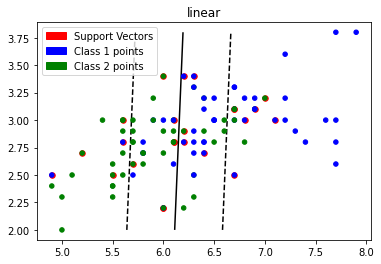

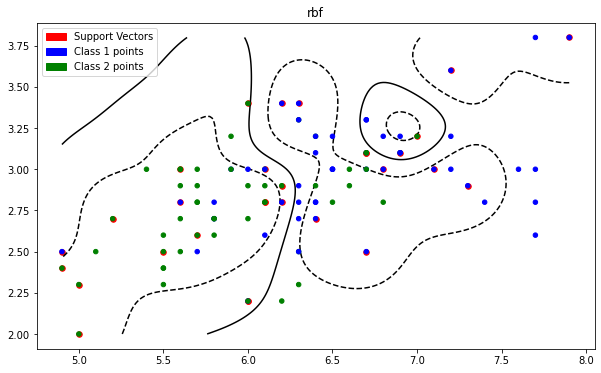

<Figure size 720x432 with 0 Axes>

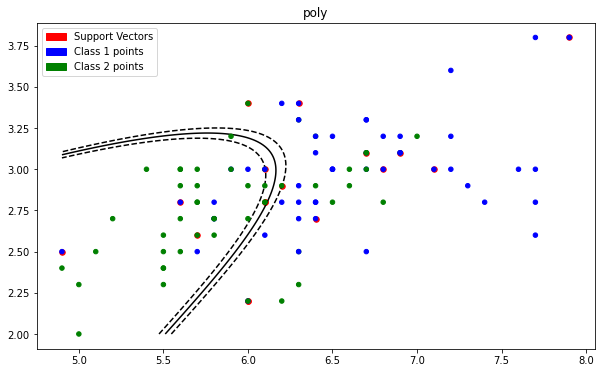

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
import matplotlib.patches as mpatches
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)
colors = ['green','blue']
groups=["Class 1 points", "Class 2 points"]
np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    # create an svm model for each of the kernels with gamma=10
    # fit the train data and calculate accuracy for train & test data
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    
    clf = svm.SVC(gamma = 10, kernel = kernel)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train,y_train)
    test_acc = clf.score(X_test,y_test)
    #train_acc=accuracy_score(y_train, clf.predict(X_train))
    #test_acc= accuracy_score(y_test, clf.predict(X_test))
    
    # TODO - change the following code
    # clf = svm.SVC()
    # clf.fit()
    # train_acc= 
    # test_acc= 
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    print (kernel , " kernel => train accuracy:", np.round(train_acc,3), "test accuracy: ", np.round(test_acc,3))
    print( "number of support vectors",np.sum(clf.n_support_))
    plt.figure(figsize=(10,6))
    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, s=20,cmap=matplotlib.colors.ListedColormap(colors))
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    #plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c='r', s=30, label= "support vectors")
    red_patch = mpatches.Patch(color='red', label='Support Vectors')
    blue_patch = mpatches.Patch(color='blue', label='Class 1 points')
    green_patch = mpatches.Patch(color='green', label='Class 2 points')
    plt.legend(handles=[red_patch, blue_patch,green_patch])
    plt.title(kernel)
plt.show()

## Soft margin vs. harder margins

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 2, :2]
y = y[y != 2]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)    # Soft SVM
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)  #Harder SVM
# build the two pipelines for the for the soft svm and the harder svm
# the first step is sclaing the data for both pipelines
#==================================================#
#               Your code starts here              #
#==================================================#

scaled_svm_clf1 = Pipeline([
    ("scaler", scaler),
    ("linear_svc1", svm_clf1)
])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc2", svm_clf2)
]) 

# TODO - change the following code
# scaled_svm_clf1 = Pipeline([
#         ("scaler", ),
#         ("linear_svc1", ),
# ])
# scaled_svm_clf2 = Pipeline([
#         ("scaler", scaler),
#        ("linear_svc2", ),
# ]) 
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


scaled_svm_clf1.fit(X_train, y_train)
scaled_svm_clf2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc2',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [7]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

In [8]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    # Complete the code below to calculate the margin
    # and gutter_up and gutter_down for the decision boundary
    #==================================================#
    #               Your code starts here              #
    #==================================================#
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    # TODO - change the following code
    # margin = 
    # gutter_up = 
    # gutter_down = 
    #==================================================#
    #               Your code ends here                #
    #               Please don't add code below here   #
    #==================================================#
    
    
    # NOTE: we have two support vectors
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

 soft margins C=1 => train accuracy: 0.7125 test accuracy:  0.85
 harder margins C=100 => train accuracy: 0.5 test accuracy:  0.6


(4.0, 7.0, 1.5, 5.0)

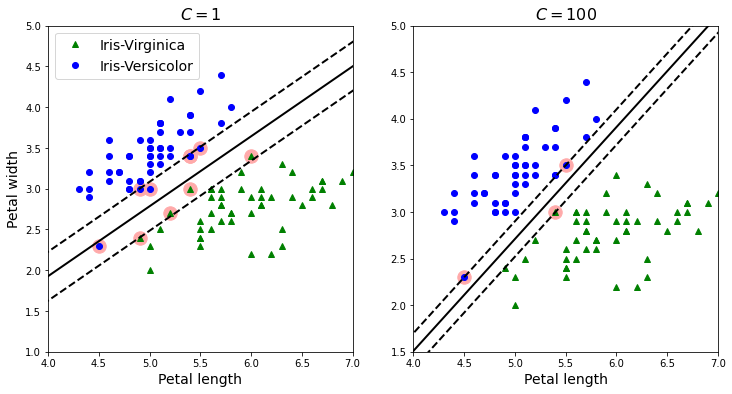

In [9]:
train_acc1= scaled_svm_clf1.score(X_train,y_train)
test_acc1= scaled_svm_clf1.score (X_test,y_test)
train_acc2= scaled_svm_clf2.score(X_train,y_train)
test_acc2= scaled_svm_clf2.score (X_test,y_test)
print (" soft margins C=1 => train accuracy:", train_acc1, "test accuracy: ", test_acc1)
print (" harder margins C=100 => train accuracy:", train_acc2, "test accuracy: ", test_acc2)


plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 2, 8)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4,7, 1, 5])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bo")
plot_svc_decision_boundary(svm_clf2, 2, 8)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 7, 1.5, 5])